# Ag Analytics-eMODIS-demo

This eMODIS API provides a Normalized Difference Vegetation Index (NDVI), which quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs).

In [ ]:
import requests
import json
import time
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%autosave 0

### API Details

####Request URL:https://ag-analytics.azure-api.net/eMODIS/[?year][&shape][&filtered][&startYear]

####Request parameters

***year - ***
The year of which you would like to receive data up to. (e.g. – 2018)

***shape - ***
(ESRI Polygon shape): The shape information for field in esriGeometryPolygon format. See example request below. Standard open source JavaScript front-end libraries (e.g., Leaflet) can be used to structure the shape.

***filtered - ***
Filter values using modified SG filter.

***startYear - ***
The year you would like the historical range to start. (e.g. 2002 -)


In order to get Ocp-Apim-Subscription-Key, please click on this link https://analytics.ag/Session/SignInToAPIPayment


### Request Parameters

In [ ]:
year=2019
shape={"rings":[[[-91.42396,38.285882],[-91.424146,38.285908],[-91.424585,38.285883],[-91.424669,38.285878],[-91.424981,38.2857],[-91.425093,38.285636],[-91.425162,38.285572],[-91.425365,38.285384],[-91.425408,38.285312],[-91.425564,38.285048],[-91.425676,38.284729],[-91.425753,38.284391],[-91.425933,38.284091],[-91.426397,38.283576],[-91.426753,38.283242],[-91.42733,38.282874],[-91.427799,38.28267],[-91.428179,38.282556],[-91.428529,38.282496],[-91.428971,38.282456],[-91.429343,38.282461],[-91.429609,38.282529],[-91.430162,38.282738],[-91.431095,38.283107],[-91.431361,38.283148],[-91.431722,38.283107],[-91.432515,38.282696],[-91.433079,38.282402],[-91.433506,38.281959],[-91.433796,38.28145],[-91.433935,38.280939],[-91.434023,38.28062],[-91.434217,38.280247],[-91.434515,38.279884],[-91.435083,38.279398],[-91.435737,38.278775],[-91.435842,38.278675],[-91.436245,38.278296],[-91.436674,38.278036],[-91.436825,38.277933],[-91.436832,38.278407],[-91.437145,38.278468],[-91.437252,38.278341],[-91.437768,38.278302],[-91.437892,38.284998],[-91.437906,38.285771],[-91.437906,38.285773],[-91.433113,38.285862],[-91.423955,38.28603],[-91.423961,38.286021],[-91.42396,38.285882]],[[-91.436093,38.278766],[-91.43616,38.278913],[-91.43631,38.278942],[-91.436473,38.278917],[-91.436465,38.278761],[-91.436374,38.278687],[-91.436166,38.278647],[-91.436093,38.278766]]],"spatialReference":{"wkid":4326}}
filtered=True
startyear=2002
headers={'Ocp-Apim-Subscription-Key': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'}
           

###  API Function

In [8]:
def get_NDVI(year,shape,filtered,startyear,headers):
    try:
        url = "https://ag-analytics.azure-api.net/eMODIS/?year={}&shape={}&filtered={}&startYear={}".format(year,shape,filtered,startyear)
        response = (requests.get(url,headers=headers).text)

        
        
        response_json = json.loads(response)
        
        print(response_json)
        

        time.sleep(0.5)
        return response_json
    
    except Exception as e:
        raise e

### Calling API Function and print output

In [9]:
ndvidata=get_NDVI(year,shape,filtered,startyear,headers)


[{'CurNDVI': [{'NDVI Value': 4017.97747129826, 'Week': 1}, {'NDVI Value': 3614.87551980224, 'Week': 2}, {'NDVI Value': 3193.50196191025, 'Week': 3}, {'NDVI Value': 2847.46007316502, 'Week': 4}, {'NDVI Value': 2662.69455238688, 'Week': 5}, {'NDVI Value': 2621.87097705604, 'Week': 6}, {'NDVI Value': 2813.58810059798, 'Week': 7}, {'NDVI Value': 3176.84356025482, 'Week': 8}, {'NDVI Value': 3603.10396641094, 'Week': 9}, {'NDVI Value': 4037.48416595199, 'Week': 10}, {'NDVI Value': 4425.09900576362, 'Week': 11}, {'NDVI Value': 4711.06333273149, 'Week': 12}]}, {'AveNDVI': [{'NDVI Value': 4341.936119717646, 'Week': 1}, {'NDVI Value': 4114.843487907076, 'Week': 2}, {'NDVI Value': 3938.5288637016956, 'Week': 3}, {'NDVI Value': 3808.9999458726243, 'Week': 4}, {'NDVI Value': 3731.5204558856476, 'Week': 5}, {'NDVI Value': 3728.8679441808963, 'Week': 6}, {'NDVI Value': 3803.897973866361, 'Week': 7}, {'NDVI Value': 3958.523914885678, 'Week': 8}, {'NDVI Value': 4159.395457096689, 'Week': 9}, {'NDVI Val

### Displaying Output

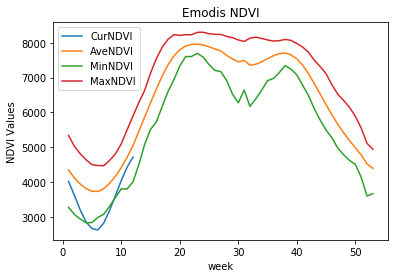

In [10]:

res=pd.DataFrame()

for i,j in enumerate(ndvidata):
    
    for index in ndvidata[i].keys():
            
        
        df = pd.DataFrame.from_records(j[index])
        df.rename(columns={'NDVI Value':index},inplace=True)
        if res.empty:
            res=df
        else:
            res=res.merge(df,on="Week",how="outer")
        
res.set_index('Week',inplace=True)
res=res.sort_index()
plt.plot(res)
plt.xlabel("week")
plt.ylabel("NDVI Values")
plt.title("Emodis NDVI")
plt.legend(res.columns)